# Show Monte Carlo results for iterative and non iterative estimators

In [1]:
import numpy as np
from simulation.generate_path import generate_path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from estimation.distance_sensor import distance_sensors
from estimation.iterative_estimator import iterative_estimator
from estimation.non_iterative_estimator import non_iterative_estimator

# For making the plots interactive, uncomment next line:
# %matplotlib widget


In [2]:
# create the path

target_initial_pos = np.array([0, 0, 5000])
target_speed_xy = 50
target_speed_z = 10
target_rot_speed = 3
time_res = 0.5
sensor_sigma = 15

path1 = generate_path(0, target_speed_xy, target_speed_z, target_initial_pos, time_res)
path1.add_straight_interval(100)
path1.add_xy_turn_interval(90, -np.deg2rad(target_rot_speed))
path1.add_straight_interval(100)

In [7]:
def calculate_MC_err(path, sensors, MC_iterations=100):
    total_err_it_est = np.zeros(path.shape)
    total_err_non_it_est = np.zeros(path.shape)
    for i in range(MC_iterations):
        try:
            # Randomize noise
            sensors.calculate_measurements(path1.path)
            # estimate the path with each estimator
            it_est = iterative_estimator(sensors, path1.path[0,:])
            non_it_est = non_iterative_estimator(sensors, path1.path[0,:])
            it_estimated_path = it_est.estimate_path()
            non_it_estimated_path = non_it_est.estimate_path()
            # calculate current error
            estimation_error_iter = np.square(it_estimated_path-path)
            estimation_error_non_iter = np.square(non_it_estimated_path-path)
            # update average error
            total_err_it_est += estimation_error_iter
            total_err_non_it_est += estimation_error_non_iter
        except KeyboardInterrupt:
            print(f"stopped after {i} iterations")
            i = i-1
            break

    mean_err_it_est = total_err_it_est / (i+1)
    mean_err_non_it_est = total_err_non_it_est / (i+1)
    return mean_err_it_est, mean_err_non_it_est



In [8]:
# MC for original sensors
sensors = distance_sensors([[-5000,0,-1000],[ 400, -7400, 0],[ 800, 800, 500],[ 8000, 1000, 0]], sensor_sigma)
mean_err_it_est, mean_err_non_it_est = calculate_MC_err(path1.path, sensors, MC_iterations=10000)


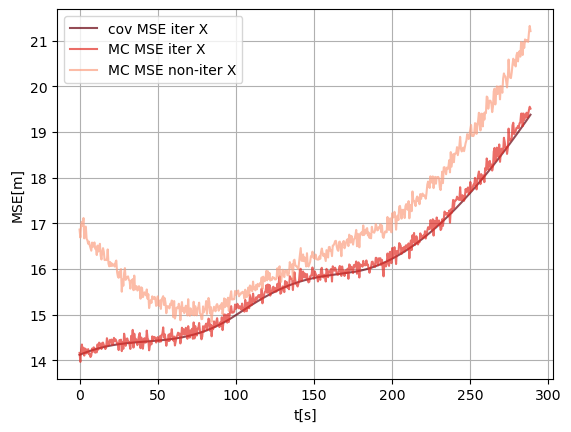

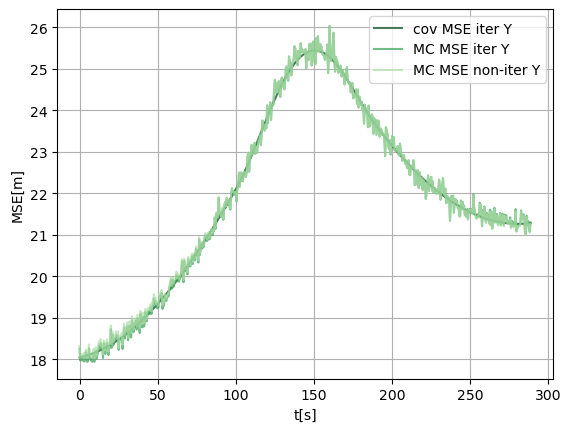

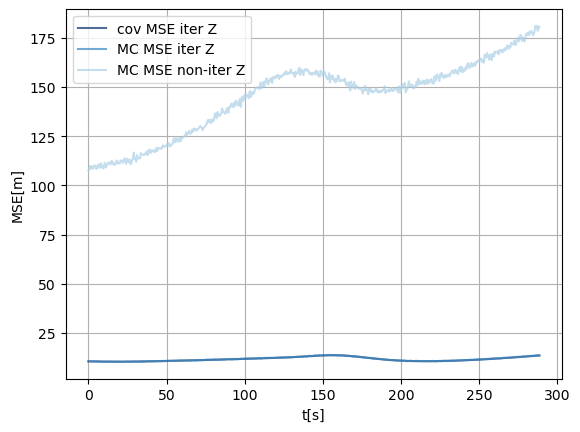

In [49]:
t = path1.time
# get theoretical cov err for iterative estimator
it_est = iterative_estimator(sensors, path1.path[0,:])
cov_mat_it = it_est.get_cov_err(path1.path)
cov_MSE_it = np.sqrt(cov_mat_it * np.square(sensors.sigma))

MC_MSE_it_est = np.sqrt(mean_err_it_est)
MC_MSE_non_it_est = np.sqrt(mean_err_non_it_est)

colormap = plt.cm.Reds
x_colors = [colormap(i) for i in np.linspace(0, 1, 4)]
colormap = plt.cm.Greens
y_colors = [colormap(i) for i in np.linspace(0, 1, 4)]
colormap = plt.cm.Blues
z_colors = [colormap(i) for i in np.linspace(0, 1, 4)]

plt.figure()
plt.plot(t, cov_MSE_it[:,0], label=f'cov MSE iter X', color=x_colors.pop(), alpha=0.7)
plt.plot(t, MC_MSE_it_est[:,0], label=f'MC MSE iter X', color=x_colors.pop(), alpha=0.7)
plt.plot(t, MC_MSE_non_it_est[:,0], label=f'MC MSE non-iter X', color=x_colors.pop(), alpha=0.7)
plt.xlabel('t[s]')
plt.ylabel('MSE[m]')
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(t, cov_MSE_it[:,1], label=f'cov MSE iter Y', color=y_colors.pop(), alpha=0.7)
plt.plot(t, MC_MSE_it_est[:,1], label=f'MC MSE iter Y', color=y_colors.pop(), alpha=0.7)
plt.plot(t, MC_MSE_non_it_est[:,1], label=f'MC MSE non-iter Y', color=y_colors.pop(), alpha=0.7)
plt.xlabel('t[s]')
plt.ylabel('MSE[m]')
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(t, cov_MSE_it[:,2], label=f'cov MSE iter Z', color=z_colors.pop(), alpha=0.7)
plt.plot(t, MC_MSE_it_est[:,2], label=f'MC MSE iter Z', color=z_colors.pop(), alpha=0.7)
plt.plot(t, MC_MSE_non_it_est[:,2], label=f'MC MSE non-iter Z', color=z_colors.pop(), alpha=0.7)
plt.xlabel('t[s]')
plt.ylabel('MSE[m]')
plt.grid()
plt.legend()
plt.show()